# Ce script crée un fichier audio WAV contenant une onde sinusoïdale à 440 Hz


In [1]:
import wave  # Module pour manipuler des fichiers audio WAV
import math  # Module pour les fonctions mathématiques comme sin()
import struct  # Module pour convertir des nombres en format binaire

# Définition des paramètres du fichier audio
nom_fichier = (
    "C:/xampp/htdocs/prg/isamm/python/tr1/exemple.wav"  # Nom du fichier à créer
)
framerate = 44100  # Nombre d'échantillons par seconde (qualité audio)
nchannels = 1  # Nombre de canaux audio (1 = mono)
sampwith = 2  # Taille de chaque échantillon (2 octets = 16 bits)
nframes = 44100  # Nombre total d'échantillons (1 seconde de son)
comptype = "NONE"  # Type de compression (aucune)
compname = "not compressed"  # Description de la compression

# Création et configuration du fichier WAV
with wave.open(nom_fichier, "w") as fichier_audio:
    # Définit les paramètres du fichier: (canaux, largeur, fréquence, nb_frames, compression, nom)
    fichier_audio.setparams(
        (nchannels, sampwith, framerate, nframes, comptype, compname)
    )

    # Génération de l'onde sinusoïdale et écriture dans le fichier
    for i in range(nframes):
        # Pour chaque échantillon i, on calcule la valeur de l'onde sinusoïdale à 440 Hz
        # 32767.0 est l'amplitude maximale pour un échantillon 16 bits signé
        valeur = int(32767.0 * math.sin(2.0 * math.pi * 440.0 * i / float(framerate)))

        # Conversion de la valeur en format binaire (little-endian, short) et écriture
        fichier_audio.writeframes(struct.pack("<h", valeur))

### Lecture de la totalité de fichier son

- création d'un nouveau fichier 'handel_output.wav' avec la meme caractéristique


In [2]:
import soundfile as sf  # Bibliothèque pour lire/écrire des fichiers audio (ex: WAV, FLAC)
import scipy.io as sio  # Utilisé parfois pour opérations sur fichiers audio (ici importé mais non utilisé)

# Lire le fichier créé précédemment; y contient les échantillons, Fs la fréquence d'échantillonnage
y, Fs = sf.read("exemple.wav")
# Écrire une copie au format WAV nommée 'handel_output.wav' avec les mêmes données et fréquence
sf.write("handel_output.wav", y, Fs)
# Supprimer les variables pour libérer la mémoire
del y, Fs
# Relire le fichier nouvellement écrit pour vérification ou traitement ultérieur
y, Fs = sf.read("handel_output.wav")

### Ecouter un son à partir de python


In [3]:
# pygame est une bibliothèque pour créer des jeux vidéo et gérer des médias
import pygame

# Initialiser Pygame
pygame.init()
# Charger le fichier audio
pygame.mixer.init()
son = pygame.mixer.Sound("exemple.wav")
# Jouer le son
son.play()
# Attendre que le son se termine
pygame.time.wait(int(son.get_length() * 1000))

# Quitter Pygame
pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


### afficher les caractéristiques d'un fichier son


In [4]:
import soundfile as sf

# Spécifiez le chemin vers votre fichier audio
filename = "C:/xampp/htdocs/prg/isamm/python/tr1/exemple.wav"
# Chargez le fichier audio
y, Fs = sf.read(filename)
# Obtenir des informations sur le fichier audio
info = {
    "filename": filename,
    "framerate": Fs,
    "nchannels": y.shape[1] if len(y.shape) > 1 else 1,
    "nframes": y.shape[0],
    "duration": y.shape[0] / Fs,
}
# Afficher les informations
print("Informations sur le fichier audio:")
for key, value in info.items():
    print(f"{key}: {value}")

Informations sur le fichier audio:
filename: C:/xampp/htdocs/prg/isamm/python/tr1/exemple.wav
framerate: 44100
nchannels: 1
nframes: 44100
duration: 1.0


### afficher l'onde sonore et son spectre


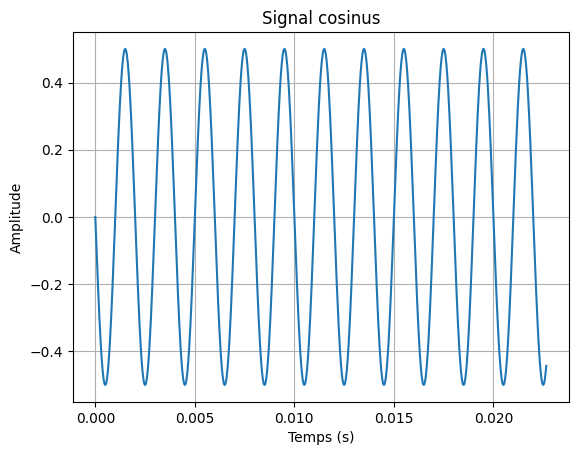

In [5]:
import numpy as np  # importe NumPy, utilisé pour le calcul numérique et pour créer des tableaux
import matplotlib.pyplot as plt  # importe matplotlib.pyplot pour tracer des figures

fs = 44100  # fréquence d'échantillonnage en Hz (nombre d'échantillons par seconde)
Ts = (
    1 / fs
)  # période d'échantillonnage en secondes (intervalle de temps entre deux échantillons)

t = np.arange(0, 2, Ts)  # vecteur temps de 0 à 2 secondes (exclu), avec un pas Ts
# np.arange(start, stop, step) crée des échantillons régulièrement espacés

x = 0.5 * np.cos(2 * np.pi * 500 * t + np.pi / 2)  # génère un signal cosinus :
# - amplitude 0.5
# - fréquence 500 Hz (2*pi*500*t)
# - déphasage de +pi/2 radians (translation de phase)

plt.plot(t[:1000], x[:1000])  # trace la courbe amplitude vs temps
plt.xlabel("Temps (s)")  # étiquette de l'axe des abscisses (temps en secondes)
plt.ylabel("Amplitude")  # étiquette de l'axe des ordonnées (amplitude du signal)
plt.title("Signal cosinus")  # titre du graphique
plt.grid(True)  # affiche une grille pour faciliter la lecture
plt.show()  # affiche la figure à l'écran (bloquant dans certains environnements)

### Transformée de Fourier (notée FFT)


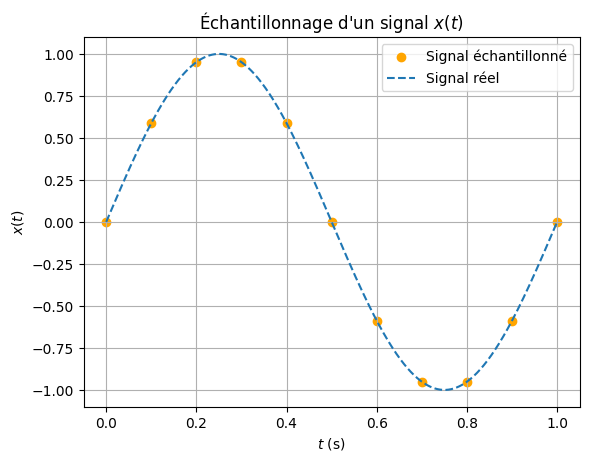

In [6]:
import numpy as np  # importe NumPy pour le calcul numérique et les tableaux
import matplotlib.pyplot as plt  # importe matplotlib.pyplot pour tracer des graphiques


def x(t):  # définit la fonction x(t) qui représente le signal continu
    return np.sin(2 * np.pi * t)  # renvoie sin(2πt) pour chaque instant t


Durée = 1  # durée totale du signal en secondes
Te = 0.1  # période d'échantillonnage (intervalle entre deux échantillons) en secondes

N = (
    int(Durée / Te) + 1
)  # nombre d'échantillons (on ajoute 1 pour inclure l'instant final)
te = np.linspace(
    0, Durée, N
)  # vecteur des instants d'échantillonnage (N points uniformes entre 0 et Durée)

t = np.linspace(
    0, Durée, 2000
)  # vecteur temps dense pour tracer la courbe "réelle" (2000 points pour la continuité)
x_e = x(te)  # valeurs du signal aux instants échantillonnés -> signal échantillonné

plt.scatter(
    te, x_e, color="orange", label="Signal échantillonné"
)  # trace les points (échantillons) en orange
plt.plot(
    t, x(t), "--", label="Signal réel"
)  # trace la courbe continue en trait pointillé
plt.grid()  # affiche une grille pour faciliter la lecture du graphique
plt.xlabel(r"$t$ (s)")  # étiquette de l'axe des abscisses (temps en secondes)
plt.ylabel(r"$x(t)$")  # étiquette de l'axe des ordonnées (valeur du signal)
plt.title(
    r"Échantillonnage d'un signal $x(t)$"
)  # titre du graphique (correction : fermer la parenthèse et le $)
plt.legend()  # affiche la légende (identifie les courbes)
plt.show()  # affiche la figure à l'écran

### Calcul de la transformée de Fourier


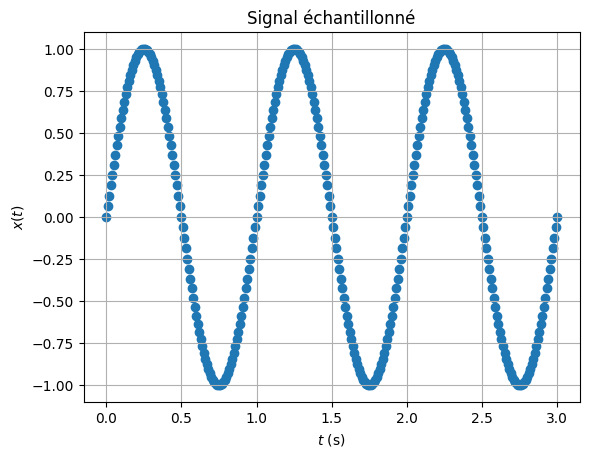

In [7]:
import numpy as np  # importe NumPy pour les opérations numériques et la création de vecteurs/tableaux
import matplotlib.pyplot as plt  # importe matplotlib.pyplot pour tracer des graphiques


def x(t):  # définit la fonction continue x(t)
    f = 1  # fréquence du signal en Hz (ici 1 Hz)
    A = 1  # amplitude du signal
    return A * np.sin(
        2 * np.pi * f * t
    )  # renvoie A * sin(2π f t) pour chaque valeur de t


Durée = 3  # durée totale du signal en secondes
Te = 0.01  # période d'échantillonnage (intervalle entre deux échantillons) en secondes
N = (
    int(Durée / Te) + 1
)  # nombre d'échantillons (on ajoute 1 pour inclure le point final)
te = np.linspace(
    0, Durée, N
)  # vecteur des instants d'échantillonnage (N points uniformes entre 0 et Durée)

x_e = x(te)  # valeurs du signal aux instants échantillonnés -> signal échantillonné

plt.scatter(
    te, x_e, label="Signal échantillonné"
)  # trace les points (échantillons) sur le graphique
plt.grid()  # affiche une grille pour faciliter la lecture
plt.xlabel(r"$t$ (s)")  # étiquette de l'axe des abscisses (temps en secondes)
plt.ylabel(r"$x(t)$")  # étiquette de l'axe des ordonnées (valeur du signal)
plt.title(r"Signal échantillonné")  # titre du graphique
plt.show()  # affiche la figure à l'écran

### Cas d'un fichier audio

- On va prendre le fichier audio hootie.wav au format wav et on va réaliser la FFT de ce signal.


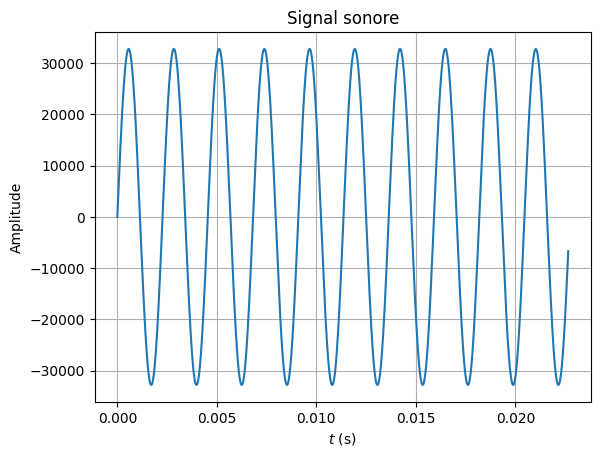

In [10]:
# Assurez-vous que ces modules sont importés quelque part avant d'exécuter ce bloc :
# import numpy as np
# import matplotlib.pyplot as plt

import scipy.io.wavfile as wavfile  # module pour lire/écrire des fichiers WAV

# Lire le fichier WAV : 'rate' est la fréquence d'échantillonnage (Hz),
# 'data' est un tableau numpy contenant les échantillons (int16, int32, etc.)
rate, data = wavfile.read("exemple.wav")

# Gérer les cas mono (1D) ou stéréo (2D) : si data est 1D, on a déjà le signal mono
if data.ndim == 1:
    x = data  # signal mono : on prend directement 'data'
else:
    x = data[:, 0]  # Sélection du canal 1
    # si stéréo, on choisit ici le premier canal (colonne 0).
    # On peut aussi faire x = data.mean(axis=1) pour un mix stéréo -> mono.

# Vecteur temps : on construit un vecteur t de la durée totale avec autant de points que d'échantillons
# np.linspace(start, stop, num, endpoint=False) crée 'num' points uniformes entre start (inclus) et stop (exclu)
t = np.linspace(0, data.shape[0] / rate, data.shape[0], endpoint=False)

# Tracer le signal échantillonné amplitude vs temps
plt.plot(t[:1000], x[:1000], label="Signal échantillonné")

plt.grid()  # affiche la grille pour faciliter la lecture
plt.xlabel(r"$t$ (s)")  # étiquette de l'axe des abscisses (temps en secondes)
plt.ylabel(r"Amplitude")  # étiquette de l'axe des ordonnées (amplitude du signal)
plt.title(r"Signal sonore")  # titre du graphique
plt.show()  # affiche la figure à l'écran

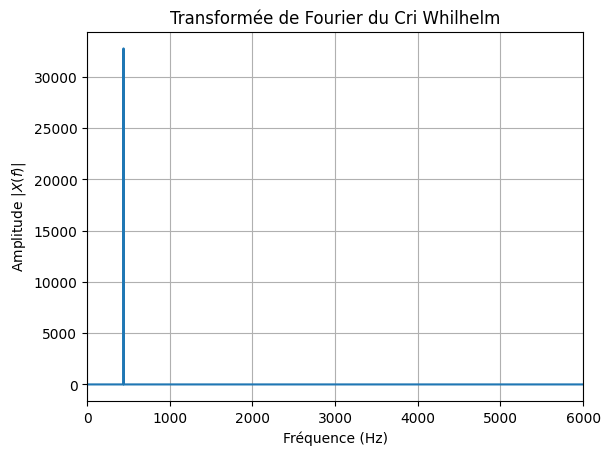

In [9]:
from numpy.fft import (
    fft,
    fftfreq,
)  # importe fft (transformée de Fourier discrète) et fftfreq (pour obtenir les fréquences correspondantes)

X = fft(x)  # calcule la FFT du signal échantillonné 'x' (complexe, même taille que x)
# Remarque : 'x' doit être un tableau NumPy 1D et défini avant cet appel.

freq = fftfreq(
    x.size, d=1 / rate
)  # calcule le vecteur de fréquences associé aux bins de la FFT
# - x.size : nombre d'échantillons
# - d = 1/rate : intervalle temporel entre échantillons (en s)
# 'rate' doit être la fréquence d'échantillonnage en Hz.

N = (
    x.size
)  # N est le nombre d'échantillons (utile pour la normalisation et le découpage)

X_abs = (
    np.abs(X[: N // 2]) * 2.0 / N
)  # prend les amplitudes pour les fréquences positives et normalise :
# - X[:N//2] : on garde la moitié inférieure (fréquences positives) pour un signal réel
# - np.abs() : magnitude (module) de la FFT (complex -> réel)
# - *2.0/N : normalisation conventionnelle pour obtenir l'amplitude réelle du signal
#   (la factor 2 répartit l'énergie symétrique entre positif/négatif)

freq_pos = freq[: N // 2]  # vecteur des fréquences positives correspondant à X_abs

plt.plot(
    freq_pos, X_abs, label="Amplitude absolue"
)  # trace le spectre amplitude vs fréquence
plt.xlim(0, 6000)  # limite l'affichage de l'axe des fréquences entre 0 et 6000 Hz
plt.grid()  # affiche la grille
plt.xlabel(r"Fréquence (Hz)")  # étiquette axe x
plt.ylabel(r"Amplitude $|X(f)|$")  # étiquette axe y (notation mathématique)
plt.title("Transformée de Fourier du Cri Whilhelm")  # titre du graphique
plt.show()  # affiche la figure

# Questions-Réponses sur le Traitement du Son Numérique

## I. Caractéristiques et Définition du Son

### Q1: Qu'est-ce que le son et quelles sont les trois phases nécessaires à son existence? R1:

- Le son est défini comme une onde produite par la vibration mécanique d'un support fluide ou solide et propagée grâce à l'élasticité du milieu environnant sous forme d'ondes longitudinales. Physiologiquement, le son désigne la sensation auditive générée par cette vibration. Pour qu'il existe, il faut trois phases : L’émission, la transmission et la réception.

### Q2: Quelles sont les trois caractéristiques principales d'un son? R2:

- Les caractéristiques d’un son sont le timbre, la sonie, et la fréquence, également appelée hauteur du son.

### Q3: Qu'est-ce que le timbre d'un son? R3:

- Le timbre est la caractéristique qui permet de différencier deux sons de même hauteur et de même intensité. Cette différence de sensation est due à la « forme » du son, c'est-à-dire à la présence d’harmonies différentes malgré des hauteurs et des intensités égales.

### Q4: Comment définit-on la sonie, et quelle est l'étendue de la gamme d'intensité audible par l'oreille humaine? R4:

- La sonie est l’intensité perçue. Elle se mesure en phones ou en sones. Bien que liée principalement à la pression acoustique, elle est aussi influencée par des facteurs tels que la durée ou la composition spectrale. La gamme d’intensités que l'oreille humaine peut percevoir est très étendue; le son le plus fort perceptible sans dommage se situe environ 120 dB au-dessus du son le plus faible, ce qui correspond à un rapport d’intensité de 10 12.

### Q5: Qu'est-ce que la fréquence, et comment classifie-t-on les sons en fonction de celle-ci? R5:

- La fréquence indique le nombre d’oscillations complètes de l’onde par seconde. Elle est exprimée en Hertz (Hz). En musique, elle est désignée par le nom de hauteur. Plus la fréquence d’un son est élevée, plus celui-ci est aigu. La classification est la suivante:
- Sons graves: fréquence inférieure à 20 Hz.
- Sons mediums: fréquences comprises entre 500 et 3000 Hz.
- Sons aigus: fréquences supérieures à 3000 Hz.

## II. Formats de Fichier Son

### Q6: Quels sont les principaux formats de fichier audio non compressés mentionnés dans les sources? R6:

- Les principaux formats non compressés sont:
- .WAVE (Wave PCM): Développé par Microsoft et IBM, c'est le format son standard de Windows, limité à 2Go.
- .AIFF: Format de stockage des sons sur les ordinateurs Macintosh d'Apple, équivalent au format WAV.
- .RAW: Format audio brut.

### Q7: Quels formats sont considérés comme compressés, et quel mécanisme utilise le format MP3 pour réduire la taille des données? R7:

- Les formats .MP3, .AAC, et la famille .RA (Real Audio) sont des formats compressés. Le format .MP3 est très populaire car il permet d'occuper quatre à douze fois moins d'espace. Pour cela, il supprime totalement certaines fréquences inaudibles par l'oreille humaine. Il exploite également un modèle psychoacoustique basé sur l'effet de « masque ».

## III. Manipulation de Fichiers Audio avec Python

### Q8: Quelles bibliothèques Python sont utilisées pour la lecture et l'écriture de fichiers audio? R8:

- Pour écrire un fichier audio, on peut utiliser la bibliothèque wave pour les fichiers WAV, ou la bibliothèque soundfile pour différents formats comme WAV ou FLAC. Pour lire la totalité d'un fichier, on utilise souvent soundfile (par exemple, y, Fs = sf.read('exemple.wav')).

### Q9: Comment peut-on jouer un fichier son à partir d'un script Python? R9:

- Pour lire et jouer un fichier audio en Python, on utilise la bibliothèque pygame. Il faut initialiser Pygame, initialiser le module pygame.mixer.init(), charger le fichier audio (pygame.mixer.Sound("exemple.wav")), puis le jouer (son.play()).

### Q10: Quelles informations sur un fichier audio peuvent être récupérées en utilisant soundfile? R10:

- Après avoir chargé un fichier audio avec soundfile, on peut récupérer des informations telles que:
- La fréquence d'échantillonnage (Fs).
- Le nombre de canaux (nchannels).
- Le nombre de frames (nframes).
- La durée du fichier audio, calculée en divisant le nombre de frames par la fréquence d'échantillonnage (y.shape/Fs).

## IV. Théorie de l'Échantillonnage et Génération de Son

### Q11: Quelle est la forme générale des signaux sinusoïdaux et quelles grandeurs représentent ses paramètres? R11:

- Les sinusoïdes forment la base des signaux audio et ont la forme x(t)=Acos(2πf
  0
  ​
  t+φ).
- A est l'amplitude de pique.
- f
  0
  ​
  est la fréquence en Hz.
- φ est le déphasage en Radians. Ces signaux sont périodiques avec une période T=1/f
  0
  ​
  secondes.

### Q12: Que stipule le théorème de Shannon-Nyquist concernant la fréquence d'échantillonnage? R12:

- Le théorème de Shannon-Nyquist indique que la fréquence d'échantillonnage (F
  e
  ​
  ) d'un signal doit être au moins le double de la fréquence maximale () du signal à échantillonner. La condition est donc : F
  e
  ​
  > 2×f
  > max

## V. Analyse Fréquentielle (FFT)

### Q13: Qu'est-ce que la Transformée de Fourier Rapide (FFT) et quelles implémentations sont disponibles dans Python? R13:

- La Transformée de Fourier (FFT) est un algorithme qui permet de calculer les transformées de Fourier discrètes d'un signal échantillonné. Les implémentations disponibles dans Python incluent scipy.fft, pyFFTW, et numpy.fft.

### Q14: Comment utilise-t-on la FFT pour obtenir le spectre d'amplitude d'un fichier audio? R14: Pour calculer le spectre d'amplitude (analyse fréquentielle) d'un fichier audio:

1. On lit les données audio et le taux d'échantillonnage (rate, data).
2. On sélectionne un canal de données (x).
3. On applique la fonction fft(x) de numpy.fft pour obtenir le signal transformé (X).
4. On calcule les fréquences correspondantes (freq = fftfreq(x.size, d=1/rate)).
5. Pour obtenir le spectre d'amplitude, on calcule la valeur absolue des résultats pour les fréquences positives (X_abs = np.abs(X[:N//2])\*2.0/N) et on trace cette amplitude par rapport à la fréquence.
